# Computing Historical Drawdown

_"A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period."_</br> Investopedia (https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp)

### Calling the Libraries and Getting the data

The data that we will use is the time series returns of IVV, it represents the SPY 500

<AxesSubplot:title={'center':'IVV'}>

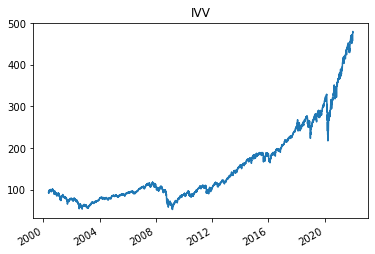

In [46]:
import yfinance as yf
import pandas as pd
import numpy as np

#We save the time series prices here (the maximum information available) 
security = yf.Ticker('IVV').history(period="max")
security.index = security.index.to_pydatetime()
#We calculate the returns
returns = security['Close'].pct_change().dropna()

security.Close.plot(title = 'IVV')

### Calculating the previous peaks

<AxesSubplot:title={'center':'Previous Peak Price'}>

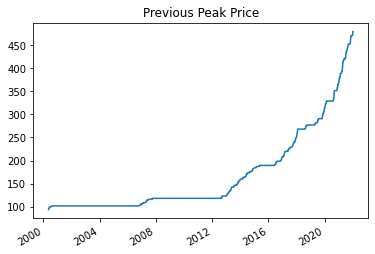

In [47]:
previous_peaks = security.Close.cummax()
previous_peaks.plot(title = "Previous Peak Price")

### Calculating the Drawdown

<ipython-input-60-00a895277cda>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  yaxis = p.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


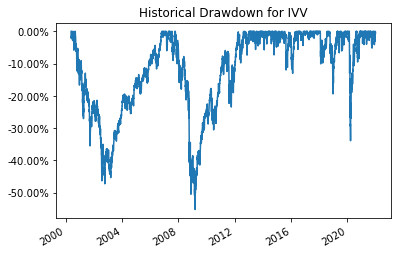

In [60]:
#It calculates the change from the peak in percentual format
drawdown = (security.Close - previous_peaks)/previous_peaks

#Plot the drawdown
p = drawdown.plot(title = "Historical Drawdown for IVV")
vals = p.get_yticks()
yaxis = p.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

### Showing the Results


In [61]:
maxDrawdown = -drawdown.min()

print(f'Maximum Drawdown {maxDrawdown*100:.2f}%')
print(f'At {str(drawdown.idxmin()).split()[0]}')

Maximum Drawdown 55.25%
At 2009-03-09
